# UPLOADING THE CSV FILE..

In [ ]:
from google.colab import drive



In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



# READING OF DATA..

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
df = pd.read_csv('/content/credit_card.csv')
df.head()


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
df.tail()


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

#DATA INSPECTION..
**Conversion of data to lowercase**


In [ ]:
df.columns= df.columns.str.lower()
df.columns

Index(['cust_id', 'balance', 'balance_frequency', 'purchases',
       'oneoff_purchases', 'installments_purchases', 'cash_advance',
       'purchases_frequency', 'oneoff_purchases_frequency',
       'purchases_installments_frequency', 'cash_advance_frequency',
       'cash_advance_trx', 'purchases_trx', 'credit_limit', 'payments',
       'minimum_payments', 'prc_full_payment', 'tenure'],
      dtype='object')

In [ ]:
## Create important derived variables

def month_avg_purchase(prch, tenure):
    return prch/tenure

def month_cash_advance(cash, tenure):
    return cash/tenure

def monthly_usage(blnc, limit):
    return blnc/limit

def prch_type(x, y):
    if ((x <= 0) & (y <= 0)):
        return 'none'
    elif((x > 0) & (y <= 0)):
        return 'one_off'
    elif((x <= 0) & (y > 0)):
        return 'installments'
    elif((x > 0) & (y > 0)):
        return 'both'

In [ ]:
df['monthly_avg_purchase'] = df.apply(lambda x : month_avg_purchase(x['purchases'], x['tenure']), axis = 1)
df['monthly_cash_advance'] = df.apply(lambda x : month_cash_advance(x['cash_advance'], x['tenure']), axis = 1)
df['monthly_usage'] = df.apply(lambda x : monthly_usage(x['balance'], x['credit_limit']), axis = 1)
df['purchase_type'] = df.apply(lambda x : prch_type(x['oneoff_purchases'], x['installments_purchases']), axis = 1)

In [ ]:
df.head()

,cust_id,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,monthly_avg_purchase,monthly_cash_advance,monthly_usage,purchase_type
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,0.040901,installments
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,0.457495,none
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,0.332687,one_off
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,124.916667,17.149001,0.222223,one_off
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,0.681429,one_off


In [ ]:
##Renaming the columns for better undersatnding easily..
#purchases_frequency = freq of months wth atleast 1 purcase..
#balance_frequency = balance in last 12months/ balance..

df.rename(columns = {'balance' : 'avg_monthly_balance'}, inplace=True)
df.head()

,cust_id,avg_monthly_balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,monthly_avg_purchase,monthly_cash_advance,monthly_usage,purchase_type
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,0.040901,installments
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,0.457495,none
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,0.332687,one_off
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,124.916667,17.149001,0.222223,one_off
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,0.681429,one_off


#IDENTIFY CATEGORICAL AND CONTINOUS VARIABLES..

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   cust_id                           8950 non-null   object 
 1   avg_monthly_balance               8950 non-null   float64
 2   balance_frequency                 8950 non-null   float64
 3   purchases                         8950 non-null   float64
 4   oneoff_purchases                  8950 non-null   float64
 5   installments_purchases            8950 non-null   float64
 6   cash_advance                      8950 non-null   float64
 7   purchases_frequency               8950 non-null   float64
 8   oneoff_purchases_frequency        8950 non-null   float64
 9   purchases_installments_frequency  8950 non-null   float64
 10  cash_advance_frequency            8950 non-null   float64
 11  cash_advance_trx                  8950 non-null   int64  
 12  purcha

In [ ]:
numeric_var_names=[key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['object']]
print(numeric_var_names)
print(cat_var_names)

['avg_monthly_balance', 'balance_frequency', 'purchases', 'oneoff_purchases', 'installments_purchases', 'cash_advance', 'purchases_frequency', 'oneoff_purchases_frequency', 'purchases_installments_frequency', 'cash_advance_frequency', 'cash_advance_trx', 'purchases_trx', 'credit_limit', 'payments', 'minimum_payments', 'prc_full_payment', 'tenure', 'monthly_avg_purchase', 'monthly_cash_advance', 'monthly_usage']
['cust_id', 'purchase_type']


In [ ]:
df.isna().sum()

cust_id                               0
avg_monthly_balance                   0
balance_frequency                     0
purchases                             0
oneoff_purchases                      0
installments_purchases                0
cash_advance                          0
purchases_frequency                   0
oneoff_purchases_frequency            0
purchases_installments_frequency      0
cash_advance_frequency                0
cash_advance_trx                      0
purchases_trx                         0
credit_limit                          1
payments                              0
minimum_payments                    313
prc_full_payment                      0
tenure                                0
monthly_avg_purchase                  0
monthly_cash_advance                  0
monthly_usage                         1
purchase_type                         0
dtype: int64

# DATA AUDIT REPORT

In [ ]:
def continous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),x.std(),
                      x.var(), x.min(), x.quantile(0.01), x.quantile(0.05), x.quantile(0.10), x.quantile(0.25),
                      x.quantile(0.50), x.quantile(0.75), x.quantile(0.90), x.quantile(0.95), 
                      x.quantile(0.99), x.max()],
                    index = ['N', 'NMiss', 'Sum', 'Mean', 'Median', 'SD', 'Var', 'Min', 'P1', 'P5', 'P10','P25',
                            'P50', 'P75', 'P90', 'P95', 'P99', 'Max'])

In [ ]:
def categorical_var_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0,1],
                     round((Mode.iloc[0,1]*100)/x.count(), 2)],
                     index = ['N', 'NMiss', 'Mode', 'Freq', 'Percent'])

In [ ]:
df[numeric_var_names].apply(lambda x : continous_var_summary(x)).T.round(1)

,N,NMiss,Sum,Mean,Median,SD,Var,Min,P1,P5,P10,P25,P50,P75,P90,P95,P99,Max
avg_monthly_balance,8950.0,0.0,14002049.7,1564.5,873.4,2081.5,4332775.0,0.0,0.1,8.8,23.6,128.3,873.4,2054.1,4338.6,5909.1,9338.8,19043.1
balance_frequency,8950.0,0.0,7851.6,0.9,1.0,0.2,0.1,0.0,0.1,0.3,0.5,0.9,1.0,1.0,1.0,1.0,1.0,1.0
purchases,8950.0,0.0,8978683.3,1003.2,361.3,2136.6,4565208.2,0.0,0.0,0.0,0.0,39.6,361.3,1110.1,2542.6,3998.6,8977.3,49039.6
oneoff_purchases,8950.0,0.0,5302314.5,592.4,38.0,1659.9,2755227.9,0.0,0.0,0.0,0.0,0.0,38.0,577.4,1600.1,2671.1,6689.9,40761.2
installments_purchases,8950.0,0.0,3679055.4,411.1,89.0,904.3,817827.4,0.0,0.0,0.0,0.0,0.0,89.0,468.6,1140.1,1750.1,3886.2,22500.0
cash_advance,8950.0,0.0,8760896.5,978.9,0.0,2097.2,4398096.3,0.0,0.0,0.0,0.0,0.0,0.0,1113.8,3065.5,4647.2,9588.2,47137.2
purchases_frequency,8950.0,0.0,4388.6,0.5,0.5,0.4,0.2,0.0,0.0,0.0,0.0,0.1,0.5,0.9,1.0,1.0,1.0,1.0
oneoff_purchases_frequency,8950.0,0.0,1812.0,0.2,0.1,0.3,0.1,0.0,0.0,0.0,0.0,0.0,0.1,0.3,0.8,1.0,1.0,1.0
purchases_installments_frequency,8950.0,0.0,3261.7,0.4,0.2,0.4,0.2,0.0,0.0,0.0,0.0,0.0,0.2,0.8,1.0,1.0,1.0,1.0
cash_advance_frequency,8950.0,0.0,1209.5,0.1,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.4,0.6,0.8,1.5


In [ ]:
df[cat_var_names].apply(lambda x : categorical_var_summary(x)).T.round(1)

,N,NMiss,Mode,Freq,Percent
cust_id,8950,0,C10001,1,0.01
purchase_type,8950,0,both,2774,30.99


# HANDLING THE DATA..
1)Outlier treatment

In [ ]:
#Handling Outliers - at 99%tile or 95%tile if required 
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.95))
    x = x.clip(lower=x.quantile(0.05))
    return x

In [ ]:
df[numeric_var_names]=df[numeric_var_names].apply(lambda x: outlier_capping(x))

2)Missing Value Imputation

In [ ]:
#Handling missings 
def Missing_imputation(x):
    x = x.fillna(x.mean())
    return x

In [ ]:
df[numeric_var_names]=df[numeric_var_names].apply(lambda x: Missing_imputation(x))
df[numeric_var_names].apply(lambda x : continous_var_summary(x)).round(3).T

,N,NMiss,Sum,Mean,Median,SD,Var,Min,P1,P5,P10,P25,P50,P75,P90,P95,P99,Max
avg_monthly_balance,8950.0,0.0,1.299806e+07,1452.298,873.385,1688.659,2.851571e+06,8.819,8.819,8.820,23.576,128.282,873.385,2054.140,4338.564,5906.672,5907.070,5907.070
balance_frequency,8950.0,0.0,7.905106e+03,0.883,1.000,0.218,4.800000e-02,0.273,0.273,0.273,0.455,0.889,1.000,1.000,1.000,1.000,1.000,1.000
purchases,8950.0,0.0,7.373077e+06,823.808,361.280,1099.653,1.209236e+06,0.000,0.000,0.000,0.000,39.635,361.280,1110.130,2542.624,3997.294,3997.511,3997.511
oneoff_purchases,8950.0,0.0,4.007649e+06,447.782,38.000,745.637,5.559746e+05,0.000,0.000,0.000,0.000,0.000,38.000,577.405,1600.099,2667.114,2667.764,2667.764
installments_purchases,8950.0,0.0,3.009065e+06,336.208,89.000,497.468,2.474741e+05,0.000,0.000,0.000,0.000,0.000,89.000,468.638,1140.070,1747.039,1747.536,1747.536
cash_advance,8950.0,0.0,7.311101e+06,816.883,0.000,1348.388,1.818151e+06,0.000,0.000,0.000,0.000,0.000,0.000,1113.821,3065.535,4640.522,4641.607,4641.607
purchases_frequency,8950.0,0.0,4.388637e+03,0.490,0.500,0.401,1.610000e-01,0.000,0.000,0.000,0.000,0.083,0.500,0.917,1.000,1.000,1.000,1.000
oneoff_purchases_frequency,8950.0,0.0,1.811996e+03,0.202,0.083,0.298,8.900000e-02,0.000,0.000,0.000,0.000,0.000,0.083,0.300,0.750,1.000,1.000,1.000
purchases_installments_frequency,8950.0,0.0,3.261714e+03,0.364,0.167,0.397,1.580000e-01,0.000,0.000,0.000,0.000,0.000,0.167,0.750,1.000,1.000,1.000,1.000
cash_advance_frequency,8950.0,0.0,1.142355e+03,0.128,0.000,0.177,3.100000e-02,0.000,0.000,0.000,0.000,0.000,0.000,0.222,0.417,0.583,0.583,0.583


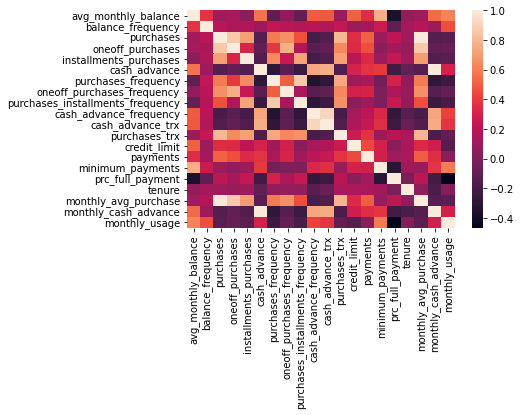

In [ ]:
cust_corr = df.corr()
#cust_corr.to_excel('cust_corr.xlsx')
sns.heatmap(cust_corr)

3)Dummy variable creation

In [ ]:
#function for creating dummy variable
def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix = colname, drop_first= True)
    df = pd.concat([df, col_dummies], axis = 1)
    df.drop(colname, axis = 1, inplace= True)
    return df
cat_var_names = df[cat_var_names].columns.difference(['cust_id'])
cat_var = df[cat_var_names]
cat_var.head()

,purchase_type
0,installments
1,none
2,one_off
3,one_off
4,one_off


In [ ]:
cat_var.head()

,purchase_type_installments,purchase_type_none,purchase_type_one_off
0,1,0,0
1,0,1,0
2,0,0,1
3,0,0,1
4,0,0,1


4)Dropping unecessary variables

In [ ]:
df.drop(columns=['cust_id'], inplace=True)

# COMBINING NUMERIC AND CATOGERICAL DATA..


In [ ]:
data_final = pd.concat([df[numeric_var_names], cat_var], axis = 1)
data_final.head()

,avg_monthly_balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,monthly_avg_purchase,monthly_cash_advance,monthly_usage,purchase_type_installments,purchase_type_none,purchase_type_one_off
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,7.950000,0.000000,0.040901,1,0,0
1,3202.467416,0.909091,0.00,0.00,0.0,4641.607350,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,0.000000,425.471347,0.457495,0,1,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,64.430833,0.000000,0.332687,0,0,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,90.046242,643.382581,0.000000,12.0,124.916667,17.149001,0.222223,0,0,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,1.333333,0.000000,0.681429,0,0,1


# STANDARDIZING THE DATA..

In [ ]:
from sklearn.preprocessing import StandardScaler
data_final.columns

Index(['avg_monthly_balance', 'balance_frequency', 'purchases',
       'oneoff_purchases', 'installments_purchases', 'cash_advance',
       'purchases_frequency', 'oneoff_purchases_frequency',
       'purchases_installments_frequency', 'cash_advance_frequency',
       'cash_advance_trx', 'purchases_trx', 'credit_limit', 'payments',
       'minimum_payments', 'prc_full_payment', 'tenure',
       'monthly_avg_purchase', 'monthly_cash_advance', 'monthly_usage',
       'purchase_type_installments', 'purchase_type_none',
       'purchase_type_one_off'],
      dtype='object')

In [ ]:
#prescreening of variables to remove less useful vraiable for segmentation
data_feature = data_final.drop(columns=['purchases', 'cash_advance'], axis = 1)

In [ ]:
sc = StandardScaler()

In [ ]:
data_final_scaled = pd.DataFrame(sc.fit_transform(data_feature))
data_final_scaled.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,-0.835856,-0.297904,-0.600570,-0.484095,-0.806490,-0.678661,-0.707313,-0.722502,-0.636381,-0.680426,-1.049826,-0.800405,-7.047781e-01,-0.525551,0.378995,-0.672593,-0.600148,-0.990042,1.720516,-0.543690,-0.514625
1,1.036483,0.118296,-0.600570,-0.675877,-1.221758,-0.678661,-0.916995,0.692644,0.295454,-0.807798,0.821159,1.643450,5.999926e-01,0.234227,0.378995,-0.757380,2.867684,0.212131,-0.581221,1.839282,-0.514625
2,0.617596,0.534496,0.436414,-0.675877,1.269843,2.673451,-0.916995,-0.722502,-0.636381,-0.043563,0.977074,-0.537138,-2.251634e-02,-0.525551,0.378995,-0.070224,-0.600148,-0.148032,-0.581221,-0.543690,1.943162
3,0.126956,-1.130304,1.409904,-0.675877,-1.014125,-0.399319,-0.916995,-0.250789,-0.403422,-0.744112,0.977074,-0.870413,-1.971802e-14,-0.525551,0.378995,0.574858,-0.460374,-0.466799,-0.581221,-0.543690,1.943162
4,-0.375812,0.534496,-0.579110,-0.675877,-1.014125,-0.399319,-0.916995,-0.722502,-0.636381,-0.744112,-0.987460,-0.501890,-5.575186e-01,-0.525551,0.378995,-0.743160,-0.600148,0.858339,-0.581221,-0.543690,1.943162


# APPLYING PCA TO REDUCE THE NUMBER OF FEATURES..

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=21)
pca.fit(data_final_scaled)

PCA(n_components=21)

In [ ]:
pca.explained_variance_

array([5.73254324, 4.44145477, 2.27402412, 1.59424872, 1.17269721,
       1.10856693, 0.87401803, 0.70615855, 0.6596713 , 0.47903756,
       0.43129932, 0.35078011, 0.22461572, 0.20930427, 0.20211718,
       0.16981157, 0.12919409, 0.10642418, 0.07567382, 0.03844883,
       0.02225709])

In [ ]:
#The amount of variance that each PC explains
var = pca.explained_variance_ratio_
var

array([0.27294775, 0.21147422, 0.10827476, 0.07590812, 0.05583649,
       0.052783  , 0.04161526, 0.03362284, 0.03140941, 0.02280876,
       0.02053577, 0.01670195, 0.01069479, 0.00996576, 0.00962355,
       0.00808536, 0.00615141, 0.00506725, 0.00360311, 0.00183069,
       0.00105974])

In [ ]:
#cummilative var explained
var1 = np.cumsum(np.round(pca.explained_variance_ratio_ , decimals=4)*100)
var1

array([ 27.29,  48.44,  59.27,  66.86,  72.44,  77.72,  81.88,  85.24,
        88.38,  90.66,  92.71,  94.38,  95.45,  96.45,  97.41,  98.22,
        98.84,  99.35,  99.71,  99.89, 100.  ])

In [ ]:
pd.DataFrame({'Eigen Values' : pca.explained_variance_, 'Cumulative Variance' : var1}, index=range(1,22))

,Eigen Values,Cumulative Variance
1,5.732543,27.29
2,4.441455,48.44
3,2.274024,59.27
4,1.594249,66.86
5,1.172697,72.44
6,1.108567,77.72
7,0.874018,81.88
8,0.706159,85.24
9,0.659671,88.38
10,0.479038,90.66


In [ ]:
pca_final = PCA(n_components=7).fit(data_final_scaled)

In [ ]:
pca_final.explained_variance_

array([5.73254324, 4.44145477, 2.27402412, 1.59424872, 1.17269721,
       1.10856693, 0.87401803])

In [ ]:
reduced_cr = pca_final.fit_transform(data_final_scaled)

In [ ]:
dimensions = pd.DataFrame(reduced_cr)
dimensions.columns = ["C1", "C2", "C3", "C4", "C5","C6", "C7"]

In [ ]:
print(dimensions.shape)
print(dimensions.head())

(8950, 7)
         C1        C2        C3        C4        C5        C6        C7
0 -0.728203 -2.807932 -0.531667 -0.307808 -0.523085  0.190222 -0.157174
1 -2.925226  2.113410 -0.119629  1.742347 -1.269790 -0.891884  0.060327
2  1.076911  0.457452  2.587912 -1.728390 -0.230464  1.092389 -0.556200
3 -0.497508 -0.404125  2.615540 -0.522462 -1.163576  1.038223  0.630969
4 -1.470450 -1.386956  1.409233 -2.032619  0.046593  0.438365 -0.630031


# APPLY K-MEANS CLUSTRING TO  CATEGORIZE THE DATASET

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
km_3 = KMeans(n_clusters=3, random_state=123)
km_3.fit(dimensions)

KMeans(n_clusters=3, random_state=123)

In [ ]:
km_4 = KMeans(n_clusters=4, random_state=123).fit(dimensions)
km_5 = KMeans(n_clusters=5, random_state=123).fit(dimensions)
km_6 = KMeans(n_clusters=6, random_state=123).fit(dimensions)
km_7 = KMeans(n_clusters=7, random_state=123).fit(dimensions)
km_8 = KMeans(n_clusters=8, random_state=123).fit(dimensions)
km_9 = KMeans(n_clusters=9, random_state=123).fit(dimensions)

In [ ]:
# save the cluster labels and sort by cluster
data_final['cluster_3'] = km_3.labels_
data_final['cluster_4'] = km_4.labels_
data_final['cluster_5'] = km_5.labels_
data_final['cluster_6'] = km_6.labels_
data_final['cluster_7'] = km_7.labels_
data_final['cluster_8'] = km_8.labels_
data_final['cluster_9'] = km_9.labels_

In [ ]:
data_final.head(10)

,avg_monthly_balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,monthly_avg_purchase,monthly_cash_advance,monthly_usage,purchase_type_installments,purchase_type_none,purchase_type_one_off,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9
0,40.900749,0.818182,95.400000,0.000000,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,7.950000,0.000000,0.040901,1,0,0,1,0,2,0,5,7,4
1,3202.467416,0.909091,0.000000,0.000000,0.00,4641.607350,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,0.000000,425.471347,0.457495,0,1,0,0,2,4,3,3,6,1
2,2495.148862,1.000000,773.170000,773.170000,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,64.430833,0.000000,0.332687,0,0,1,1,1,1,4,0,3,8
3,1666.670542,0.636364,1499.000000,1499.000000,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,90.046242,643.382581,0.000000,12.0,124.916667,17.149001,0.222223,0,0,1,1,1,1,4,0,3,8
4,817.714335,1.000000,16.000000,16.000000,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,1.333333,0.000000,0.681429,0,0,1,1,1,1,4,0,3,8
5,1809.828751,1.000000,1333.280000,0.000000,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0.0,8.0,1800.0,1400.057770,2407.246035,0.000000,12.0,111.106667,0.000000,0.966630,1,0,0,1,0,2,1,2,4,0
6,627.260806,1.000000,3997.510824,2667.764135,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0.0,57.0,12000.0,6080.951545,198.065894,1.000000,12.0,338.939625,0.000000,0.046464,0,0,0,2,3,3,5,4,0,2
7,1823.652743,1.000000,436.200000,0.000000,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,12.0,2300.0,679.065082,532.033990,0.000000,12.0,36.350000,0.000000,0.792892,1,0,0,1,0,2,1,2,4,0
8,1014.926473,1.000000,861.490000,661.490000,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0.0,5.0,7000.0,688.278568,311.963409,0.000000,12.0,71.790833,0.000000,0.144989,0,0,0,1,1,1,4,0,3,8
9,152.225975,0.545455,1281.600000,1281.600000,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0.0,3.0,11000.0,1164.770591,100.302262,0.000000,12.0,106.800000,0.000000,0.013839,0,0,1,1,1,1,4,0,5,4


# SEGMENT SIZE CHECK

In [ ]:
data_final['cluster_3'].value_counts()

1    4328
0    2965
2    1657
Name: cluster_3, dtype: int64

In [ ]:
data_final['cluster_3'].value_counts()/sum(data_final['cluster_3'].value_counts())

1    0.483575
0    0.331285
2    0.185140
Name: cluster_3, dtype: float64

In [ ]:
data_final['cluster_4'].value_counts()/sum(data_final['cluster_4'].value_counts())

0    0.307486
2    0.292849
1    0.231732
3    0.167933
Name: cluster_4, dtype: float64

In [ ]:
data_final['cluster_5'].value_counts()/sum(data_final['cluster_5'].value_counts())

2    0.309050
1    0.213408
0    0.190279
3    0.157989
4    0.129274
Name: cluster_5, dtype: float64

In [ ]:
data_final['cluster_6'].value_counts()/sum(data_final['cluster_6'].value_counts())

0    0.212514
4    0.190503
2    0.187598
1    0.154413
5    0.139330
3    0.115642
Name: cluster_6, dtype: float64